ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [1]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

Sorted = [30, 31, 32, 32, 33, 33, 34, 34, 35, 500]

since n = 10 so median = (5th value + 6th value)/2

median = (33+33)/2 = 33

from lower half we get q1 = 32

from upper half we get q3 = 34

IQR = q3-q1 = 2

lower fence = q1 - 1.5*IQR = 32 - 1.5*2 = 29

upper fence = q3 + 1.5*IQR = 34 + 1.5*2 = 37

since 500 is out of upper bound for that 500 is an outlier.

**Median + IQR is better than mean + standard deviation is because median and IQR are not affected by outliers in a dataset. In the given dataset 500 is an outlier if we calculate using the normal way in that way the mean would be much larger than the actual value. So, when a dataset has outliers, the median and IQR give a more correct picture of what is “normal” in the data.**

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
sorted_data = sorted(data_q1)


median = np.median(sorted_data)


Q1 = np.percentile(sorted_data, 25)
Q3 = np.percentile(sorted_data, 75)


IQR = Q3 - Q1


lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR


is_500_outlier = 500 > upper_fence or 500 < lower_fence

print("Sorted Data:", sorted_data)
print("Median:", median)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)
print("Is 500 an outlier?", is_500_outlier)

Sorted Data: [30, 31, 32, 32, 33, 33, 34, 34, 35, 500]
Median: 33.0
Q1: 32.0
Q3: 34.0
IQR: 2.0
Lower Fence: 29.0
Upper Fence: 37.0
Is 500 an outlier? True


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._

Given:

Prevalence = P(D) = 0.01

Sensitivity = P(+ | D) = 0.90

Specificity = 0.92 → P(+ | No D) = 1 − 0.92 = 0.08

P(No D) = 0.99

Bayes formula:
P(D | +) = [P(+ | D) × P(D)] / ([P(+ | D) × P(D)] + [P(+ | No D) × P(No D)])


P(+ | D) * P(D) = 0.90 * 0.01 = 0.009  
P(+ | No D) * P(No D) = 0.08 * 0.99 = 0.0792  
Denominator = 0.009 + 0.0792 = 0.0882

PPV = 0.009 / 0.0882 = 0.102 → about 10%

So if someone tests positive, there is only about a 10% chance they actually have the disease.

If prevalence increases to 20%:
More people already have the disease, so true positives become much more common. Since Bayes’ formula puts more weight on P(D) when the disease is common, the PPV goes up. So PPV becomes much higher because positive tests are more likely to be real positives when many people in the population are infected.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._

The target variable here is premium_user which is either 0 or 1

firstly I will handle the missing values using median for numeric columns and use mode for categorical features.

Then I will use One Hot Encoding for catergorical feathers with 7 levels.

After Scaling the age and most click columns I will use train and test split for the model to train and test.

First, I would load the raw dataset and inspect it for missing values, incorrect data types, and obvious errors. Then I would clean the data by replacing missing numeric values using the median and filling missing categorical values with the mode values. Next, I would encode the region variable using one-hot encoding so the model can understand it. After that, I would scale the numeric columns age and daily_clicks so all numeric inputs are on similar ranges. Once preprocessing is complete, I would split the dataset into training and testing sets to allow proper evaluation. I would then choose a classification model such as logistic regression and train it using the training data. After training, I would evaluate the model using metrics like accuracy, precision, recall, and the confusion matrix.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [ ]:
# Q4 – Student Answer
# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

## **Missing Values**

In [ ]:
print("Missing values per column:")
print(df.isna().sum(), "\n")


Missing values per column:
age             0
purchases       0
premium_user    0
region_east     0
region_north    0
region_south    0
region_west     0
high_spender    0
dtype: int64 



### **Unique Values**

In [ ]:
print("Number of unique values per column:")
print(df.nunique(), "\n")

Number of unique values per column:
age             5
region          4
purchases       6
premium_user    2
dtype: int64 



## **Corelation to the numeric features**

In [ ]:
print("Correlation among numeric columns:")
print(df.corr(numeric_only=True), "\n")

Correlation among numeric columns:
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000 



## **Histogram**

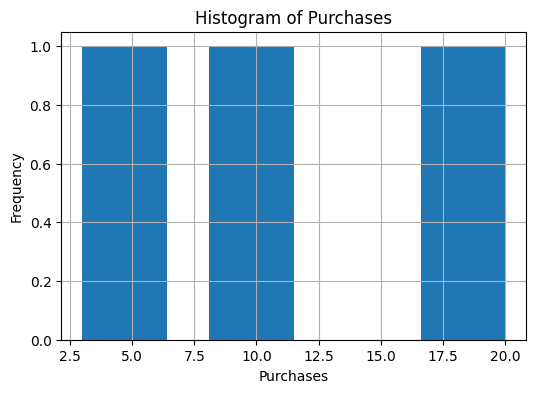

In [ ]:
df["purchases"].hist()
plt.xlabel("Purchases")
plt.ylabel("Frequency")
plt.title("Histogram of Purchases")
plt.show()

## **Bar Plot**

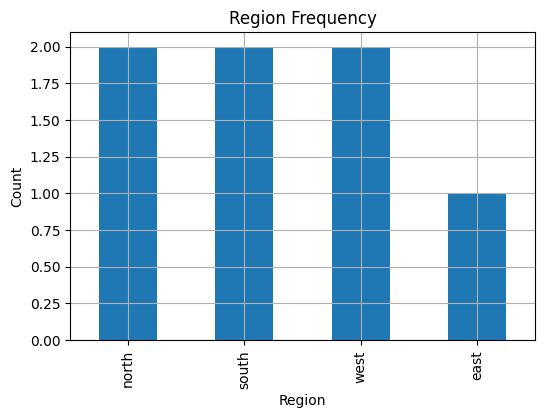

In [ ]:
df["region"].value_counts().plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region Frequency")
plt.show()

## **Preprocessing**

In [ ]:
df["age"] = df["age"].fillna(df["age"].median())
df["purchases"] = df["purchases"].fillna(df["purchases"].mean())

#Ont hot encoded
df = pd.get_dummies(df, columns=["region"], drop_first=False)

scaler = RobustScaler()
numeric_cols = ["age", "purchases"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#Domain Driven Features
purchase_median = df["purchases"].median()
df["high_spender"] = (df["purchases"] > purchase_median).astype(int)

print("Final transformed dataframe:")
print(df)

Final transformed dataframe:
   age  purchases  premium_user  region_east  region_north  region_south  \
0 -0.5  -0.943820             0        False          True         False   
1  0.0   0.000000             1        False         False          True   
2  0.0  -0.674157             0        False          True         False   
3 -0.8   0.112360             0         True         False         False   
4  1.5   1.348315             1        False         False         False   
5  2.2   1.078652             1        False         False         False   
6  0.0  -0.134831             0        False         False          True   

   region_west  high_spender  
0        False             0  
1        False             0  
2        False             0  
3        False             1  
4         True             1  
5         True             1  
6        False             0  


---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [3]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


## **Train-Test Split**

In [4]:
X = df2[["area_sqft", "bedrooms"]]
y = df2["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_test, y_train, y_test

(   area_sqft  bedrooms
 5       2000         4
 2       1200         3
 4       1800         4
 3       1500         3,
    area_sqft  bedrooms
 0        800         2
 1       1000         2,
 5    300
 2    170
 4    260
 3    210
 Name: price, dtype: int64,
 0    120
 1    150
 Name: price, dtype: int64)

## **Linear Regression Model**

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Predictions and Co-efficients**

In [6]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]
Predictions on test set: [100.         130.76923077]


## **Evaluation Metrics**

In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 19.615384615384613
RMSE: 19.61915499208746
R²: -0.7107166337935567


## **Residual Plot**

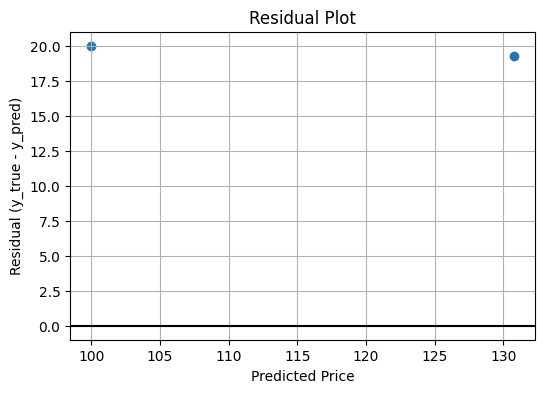

In [8]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='black')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residual Plot")
plt.show()

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

#Threshold 0.5
y_pred_05 = (y_prob >= 0.5).astype(int)

cm_05 = confusion_matrix(y_true, y_pred_05)
prec_05 = precision_score(y_true, y_pred_05)
rec_05 = recall_score(y_true, y_pred_05)
f1_05 = f1_score(y_true, y_pred_05)

print("=== Threshold 0.5 ===")
print("Confusion matrix:\n", cm_05)
print("Precision:", prec_05)
print("Recall:", rec_05)
print("F1 score:", f1_05)

#Threshold 0.3
y_pred_03 = (y_prob >= 0.3).astype(int)

cm_03 = confusion_matrix(y_true, y_pred_03)
prec_03 = precision_score(y_true, y_pred_03)
rec_03 = recall_score(y_true, y_pred_03)
f1_03 = f1_score(y_true, y_pred_03)

print("\n=== Threshold 0.3 ===")
print("Confusion matrix:\n", cm_03)
print("Precision:", prec_03)
print("Recall:", rec_03)
print("F1 score:", f1_03)

=== Threshold 0.5 ===
Confusion matrix:
 [[5 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
F1 score: 1.0

=== Threshold 0.3 ===
Confusion matrix:
 [[3 2]
 [0 5]]
Precision: 0.7142857142857143
Recall: 1.0
F1 score: 0.8333333333333334


**Lowring the threshold from 0.5 to 0.3 makes the model predict more positives. This cause recall to increase cause the model now predict more of the actual 1. However with this precision declines and the model predicts more false positives for that precision goes down. In short lower threshold cause more positives which can lead to higher recall and lower precision.**

## **ROC And AUC**

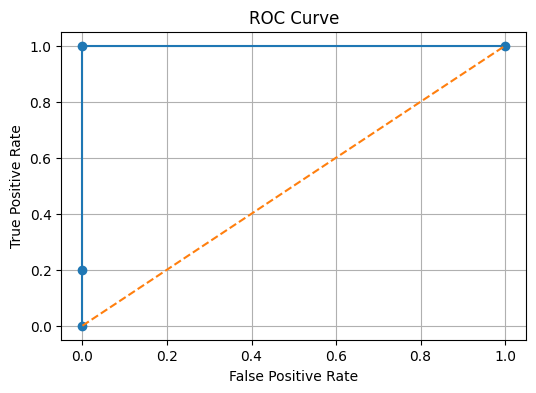

AUC = 1.000


In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC =", format(roc_auc, ".3f"))

**A high AUC means the model is good at telling positives and negatives apart.
A low AUC means the model is bad at separating them its predictions are not very helpful.**

## **Decision Tree**

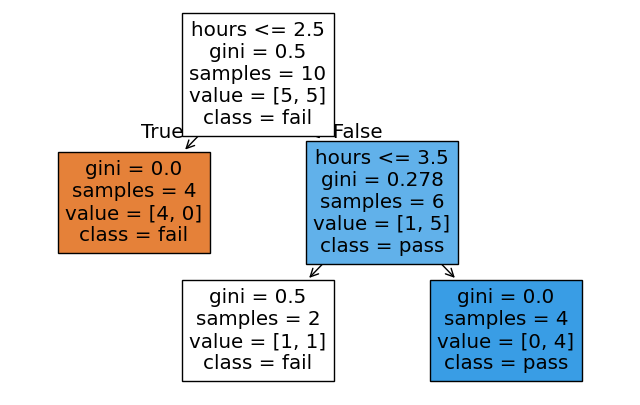

In [ ]:
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

X = df3[["hours"]]
y = df3["passed"]

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

plt.figure(figsize=(8,5))
plot_tree(tree, filled=True, feature_names=["hours"], class_names=["fail","pass"])
plt.show()

**The dataset is tiny, so a big tree would memorize it.
Because the tree is small it's depth is 2, it is less likely to overfit.
But with only 10 rows, any model can still be a bit unstable.**

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._